In [35]:
# Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from scipy import stats

import seaborn as sns
# Store filepath in a variable
file_one = "baseball_2.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
baseball_df = pd.read_csv(file_one, encoding="ISO-8859-1")

# Show just the header
baseball_df.head()


,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,RA,Attendance,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current
0,1,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,...,890,2036216,26.7,26.4,50,29,J.Segura,5.7,C.Hale (69-93),Arizona Diamondbacks
1,2,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,...,713,2080145,26.6,27.1,50,27,P.Goldschmidt,8.8,C.Hale (79-83),Arizona Diamondbacks
2,3,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,...,742,2073730,27.6,28.0,52,25,P.Goldschmidt,4.5,K.Gibson (63-96) and A.Trammell (1-2),Arizona Diamondbacks
3,4,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,695,2134895,28.1,27.6,44,23,P.Goldschmidt,7.1,K.Gibson (81-81),Arizona Diamondbacks
4,5,5,2012,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,688,2177617,28.3,27.4,48,23,A.Hill,5.0,K.Gibson (81-81),Arizona Diamondbacks


In [4]:
len(baseball_df)

330

In [5]:
war_avg_df = baseball_df["War"].mean()
war_avg_df

6.08787878787879

In [6]:
baseball_df['War_Dummy']=baseball_df['War'].apply(lambda x: 1 if x >= 6 else 0)
baseball_df.tail()

,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,Attendance,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current,War_Dummy
325,2553,7,2010,Washington Nationals,NL East,162,69,93,0,0.426,...,1828066,29.1,28.0,46,26,R.Zimmerman,6.2,J.Riggleman (69-93),Washington Nationals,1
326,2554,8,2009,Washington Nationals,NL East,162,59,103,0,0.364,...,1817226,28.4,27.4,55,30,R.Zimmerman,7.3,M.Acta (26-61) and J.Riggleman (33-42),Washington Nationals,1
327,2555,9,2008,Washington Nationals,NL East,161,59,102,0,0.366,...,2320400,27.7,27.3,50,25,C.Guzman,4.6,M.Acta (59-102),Washington Nationals,0
328,2556,10,2007,Washington Nationals,NL East,162,73,89,0,0.451,...,1943812,27.9,27.5,47,26,R.Zimmerman,4.6,M.Acta (73-89),Washington Nationals,0
329,2557,11,2006,Washington Nationals,NL East,162,71,91,0,0.438,...,2153056,28.5,28.9,57,29,A.Soriano,6.1,F,NaN,1


In [7]:
baseball_df['War_Dummy']=baseball_df['War'].apply(lambda x: 1 if x >= 6 else 0)

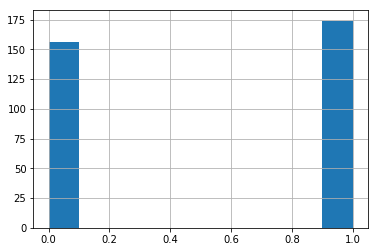

Index(['Unnamed: 0', 'Rk', 'Year', 'Tm', 'Lg', 'G', 'W', 'L', 'Ties', 'W.L.',
       'pythW.L.', 'Finish', 'GB', 'Playoffs', 'R', 'RA', ' Attendance ',
       'BatAge', 'PAge', 'X.Bat', 'X.P', 'Top.Player', 'War', 'Managers',
       'current', 'War_Dummy'],
      dtype='object')

In [8]:
baseball_df["War_Dummy"].hist()
pl.show()

baseball_df.keys()

In [9]:
#pd.crosstab(baseball_df['Attendance'], baseball_df['War_Dummy'], rownames=['Attendance'])

In [10]:
dummy_ranks = pd.get_dummies(baseball_df['War_Dummy'], prefix='War_Dummy')
dummy_ranks.head()

,War_Dummy_0,War_Dummy_1
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [11]:
baseball_df['Attendance']=pd.to_numeric(baseball_df[' Attendance '])

In [124]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
War_stat = baseball_df["War"]
Attendance = baseball_df["Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(Attendance, War_stat)
W_fit = W_slope * Attendance + W_int

In [12]:
%matplotlib inline

In [13]:
baseball_df.dtypes


Unnamed: 0        int64
Rk                int64
Year              int64
Tm               object
Lg               object
G                 int64
W                 int64
L                 int64
Ties              int64
W.L.            float64
pythW.L.        float64
Finish           object
GB               object
Playoffs         object
R                 int64
RA                int64
 Attendance       int64
BatAge          float64
PAge            float64
X.Bat             int64
X.P               int64
Top.Player       object
War             float64
Managers         object
current          object
War_Dummy         int64
Attendance        int64
dtype: object

In [ ]:
# Grab violent crime rates
violent_crime_rate = crime_data.iloc[:, 3]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(
    year, violent_crime_rate)
vc_fit = vc_slope * year + vc_int
do one yeat at atime , dummy nat vs. ALmer league, discrete random variable new = 0, 1year old =1

In [14]:
#grouped_year_team = pd.DataFrame(baseball_df.groupby(df_all.index.year).sum())
groupedby_baseball = baseball_df.groupby(["Tm", "Year"])
groupedby_baseball

In [15]:
teamgp_df = baseball_df.groupby(["Tm"])

In [17]:
teamgp_df.head()

,Unnamed: 0,Rk,Year,Tm,Lg,G,W,L,Ties,W.L.,...,BatAge,PAge,X.Bat,X.P,Top.Player,War,Managers,current,War_Dummy,Attendance
0,1,1,2016,Arizona Diamondbacks,NL West,162,69,93,0,0.426,...,26.7,26.4,50,29,J.Segura,5.7,C.Hale (69-93),Arizona Diamondbacks,0,2036216
1,2,2,2015,Arizona Diamondbacks,NL West,162,79,83,0,0.488,...,26.6,27.1,50,27,P.Goldschmidt,8.8,C.Hale (79-83),Arizona Diamondbacks,1,2080145
2,3,3,2014,Arizona Diamondbacks,NL West,162,64,98,0,0.395,...,27.6,28.0,52,25,P.Goldschmidt,4.5,K.Gibson (63-96) and A.Trammell (1-2),Arizona Diamondbacks,0,2073730
3,4,4,2013,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,28.1,27.6,44,23,P.Goldschmidt,7.1,K.Gibson (81-81),Arizona Diamondbacks,1,2134895
4,5,5,2012,Arizona Diamondbacks,NL West,162,81,81,0,0.500,...,28.3,27.4,48,23,A.Hill,5.0,K.Gibson (81-81),Arizona Diamondbacks,0,2177617
11,20,1,2016,Atlanta Braves,NL East,161,68,93,0,0.422,...,28.9,26.4,60,35,F.Freeman,6.5,F.Gonzalez (9-28) and B.Snitker (59-65),Atlanta Braves,1,2020914
12,21,2,2015,Atlanta Braves,NL East,162,67,95,0,0.414,...,28.8,26.6,60,37,A.Simmons,4.0,F.Gonzalez (67-95),Atlanta Braves,0,2001392
13,22,3,2014,Atlanta Braves,NL East,162,79,83,0,0.488,...,26.8,27.3,39,20,J.Heyward,6.2,F.Gonzalez (79-83),Atlanta Braves,1,2354305
14,23,4,2013,Atlanta Braves,NL East,162,96,66,0,0.593,...,26.8,27.2,44,21,A.Simmons,7.0,F.Gonzalez (96-66),Atlanta Braves,1,2548679
15,24,5,2012,Atlanta Braves,NL East,162,94,68,0,0.580,...,28.5,27.6,41,21,M.Bourn,6.1,F.Gonzalez (94-68),Atlanta Braves,1,2420171


In [18]:
# Extract item Data
specific_bball = baseball_df.loc[:,["Tm", "Attendance", "Lg", "War", "W"]]

# Perform basic calculations
avg_attendance = specific_bball.groupby(["Tm", "Lg"]).mean()["Attendance"].rename("Average_Attendance")
avg_war = specific_bball.groupby(["Tm", "Lg"]).mean()["War"].rename("Average_WAR")
avg_wins = specific_bball.groupby(["Tm", "Lg"]).mean()["W"].rename("Average_Wins")
#league = specific_bball.groupby(["Tm"]).apply()["Lg"].rename("League")
# Create new DataFrame
item_data_pd = pd.DataFrame({"Average_Attendance": avg_attendance, "Average_WAR": avg_war, "Average_Wins": avg_wins})
item_data_pd.head()

,,Average_Attendance,Average_WAR,Average_Wins
Tm,Lg,,,
Arizona Diamondbacks,NL West,2.156396e+06,6.290909,77.363636
Atlanta Braves,NL East,2.402792e+06,6.109091,82.272727
Baltimore Orioles,AL East,2.094682e+06,5.527273,77.272727
Boston Red Sox,AL East,2.980117e+06,6.690909,87.181818
Chicago Cubs,NL Central,3.023161e+06,5.645455,79.727273


In [19]:
baseball_final = item_data_pd.reset_index(level='Lg')
baseball_final.head()
baseball_final.dtypes

Lg                     object
Average_Attendance    float64
Average_WAR           float64
Average_Wins          float64
dtype: object

In [20]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
War_stat = baseball_final["Average_WAR"]
Attendance = baseball_final["Average_Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(Attendance, War_stat)
W_fit = W_slope * Attendance + W_int

In [21]:
W_fit

Tm
Arizona Diamondbacks             5.935016
Atlanta Braves                   6.062370
Baltimore Orioles                5.903118
Boston Red Sox                   6.360769
Chicago Cubs                     6.383017
Chicago White Sox                5.925104
Cincinnati Reds                  5.943621
Cleveland Indians                5.714949
Colorado Rockies                 6.173456
Detroit Tigers                   6.266014
Florida Marlins                  5.542276
Houston Astros                   5.836596
Houston Astros                   6.101535
Kansas City Royals               5.779913
Los Angeles Angels of Anaheim    6.463744
Los Angeles Dodgers              6.696365
Miami Marlins                    5.751086
Milwaukee Brewers                6.238336
Minnesota Twins                  6.106993
New York Mets                    6.288491
New York Yankees                 6.720516
Oakland Athletics                5.696738
Philadelphia Phillies            6.372909
Pittsburgh Pirates             

In [22]:
baseball_final['League_Dummy']=baseball_final['Lg'].apply(lambda x: 1 if (x == "NL East" or x == "NL West" 
                                                          or x == "NL Central")
                                                          else 0)
                                                          
                                            

In [23]:
baseball_final

,Lg,Average_Attendance,Average_WAR,Average_Wins,League_Dummy
Tm,,,,,
Arizona Diamondbacks,NL West,2.156396e+06,6.290909,77.363636,1
Atlanta Braves,NL East,2.402792e+06,6.109091,82.272727,1
Baltimore Orioles,AL East,2.094682e+06,5.527273,77.272727,0
Boston Red Sox,AL East,2.980117e+06,6.690909,87.181818,0
Chicago Cubs,NL Central,3.023161e+06,5.645455,79.727273,1
Chicago White Sox,AL Central,2.137219e+06,5.618182,79.272727,0
Cincinnati Reds,NL Central,2.173045e+06,5.963636,79.000000,1
Cleveland Indians,AL Central,1.730625e+06,5.854545,80.818182,0
Colorado Rockies,NL West,2.617715e+06,5.836364,75.909091,1


In [43]:
X = baseball_final["Average_WAR"]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
plt.savefig("OLS_WAR.png")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     10.79
Date:                Wed, 10 Oct 2018   Prob (F-statistic):            0.00253
Time:                        21:23:18   Log-Likelihood:                -481.25
No. Observations:                  33   AIC:                             966.5
Df Residuals:                      31   BIC:                             969.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.089e+05   9.29e+05     -0.656      0.517    -2.5e+06    1.28e+06
Average_WAR  4.996e+05   1.52e+05      3.285      0.003    1.89e+05     8.1e+05
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.287
Skew:                          -0.194   Prob(JB):                        0.866
Kurtosis:                       2.761   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
X = baseball_final["Average_Wins"]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
plt.savefig("OLS_Wins.png")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     26.35
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           1.47e-05
Time:                        21:24:01   Log-Likelihood:                -476.03
No. Observations:                  33   AIC:                             956.1
Df Residuals:                      31   BIC:                             959.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.233e+06   1.11e+06     -2.925      0.006   -5.49e+06   -9.79e+05
Average_Wins  7.063e+04   1.38e+04      5.133      0.000    4.26e+04    9.87e+04
==============================================================================
Omnibus:                        6.244   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.669
Skew:                          -0.846   Prob(JB):                       0.0969
Kurtosis:                       3.730   Cond. No.                     1.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X = baseball_final[["Average_Wins","Average_WAR"]] ## X usually means our input variables (or independent variables)
y = baseball_final["Average_Attendance"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
plt.savefig("OLS_WAR_Wins.png")
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     13.20
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           7.72e-05
Time:                        21:24:23   Log-Likelihood:                -475.76
No. Observations:                  33   AIC:                             957.5
Df Residuals:                      30   BIC:                             962.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.305e+06   1.12e+06     -2.953      0.006   -5.59e+06   -1.02e+06
Average_Wins  6.245e+04   1.82e+04      3.440      0.002    2.54e+04    9.95e+04
Average_WAR   1.197e+05   1.71e+05      0.699      0.490    -2.3e+05    4.69e+05
==============================================================================
Omnibus:                        6.455   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                4.829
Skew:                          -0.797   Prob(JB):                       0.0894
Kurtosis:                       3.984   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X = baseball_final[["Average_Wins", "Average_WAR", "League_Dummy"]]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
plt.savefig("OLS_WAR_Wins_Dummy.png")

In [47]:
X = baseball_final[["Average_Wins", "League_Dummy"]]
y = baseball_final["Average_Attendance"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
plt.savefig("OLS_Wins_Dummy.png")

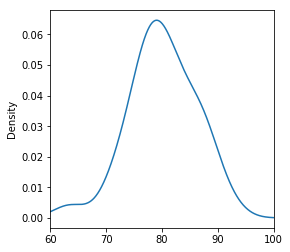

In [32]:
baseball_final["Average_Wins"].plot(kind="density",  # Create density plot
                      figsize=(4,4),    # Set figure size
                      xlim= (60, 100))      # Limit x axis values

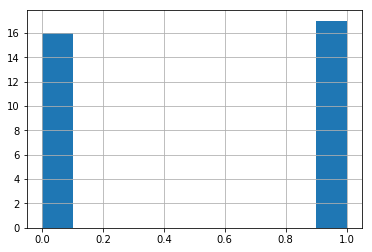

In [61]:
baseball_final["League_Dummy"].hist()




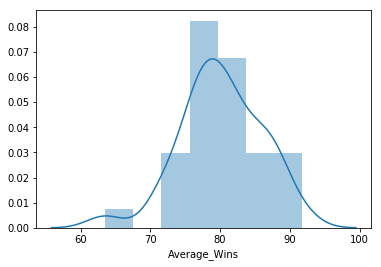

In [48]:
sns.distplot(baseball_final["Average_Wins"], hist=True, rug=False)
plt.savefig("Histo_Kernel_Wins.png")

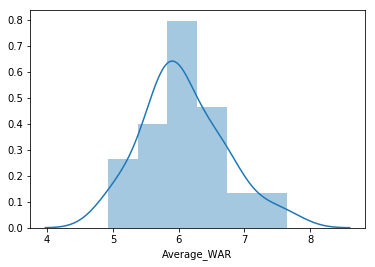

In [49]:
sns.distplot(baseball_final["Average_WAR"], hist=True, rug=False)
plt.savefig("Histo_Kernel_WAR.png")

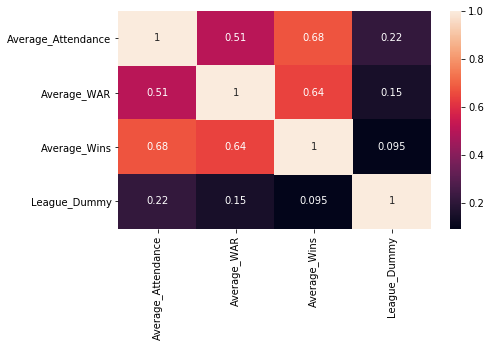

In [50]:
correlationMatrix = baseball_final.corr().abs()

plt.subplots(figsize=(7, 4))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()
plt.savefig("Correlation_Table.png")

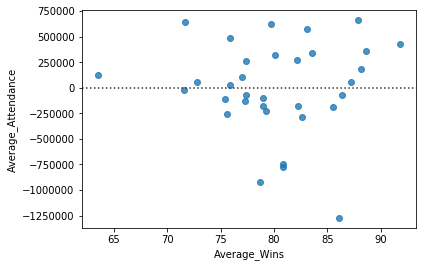

In [53]:
# simple plot of residuals
sns.residplot('Average_Wins', 'Average_Attendance', data=baseball_final)
plt.savefig("residualplot_wins.png")

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


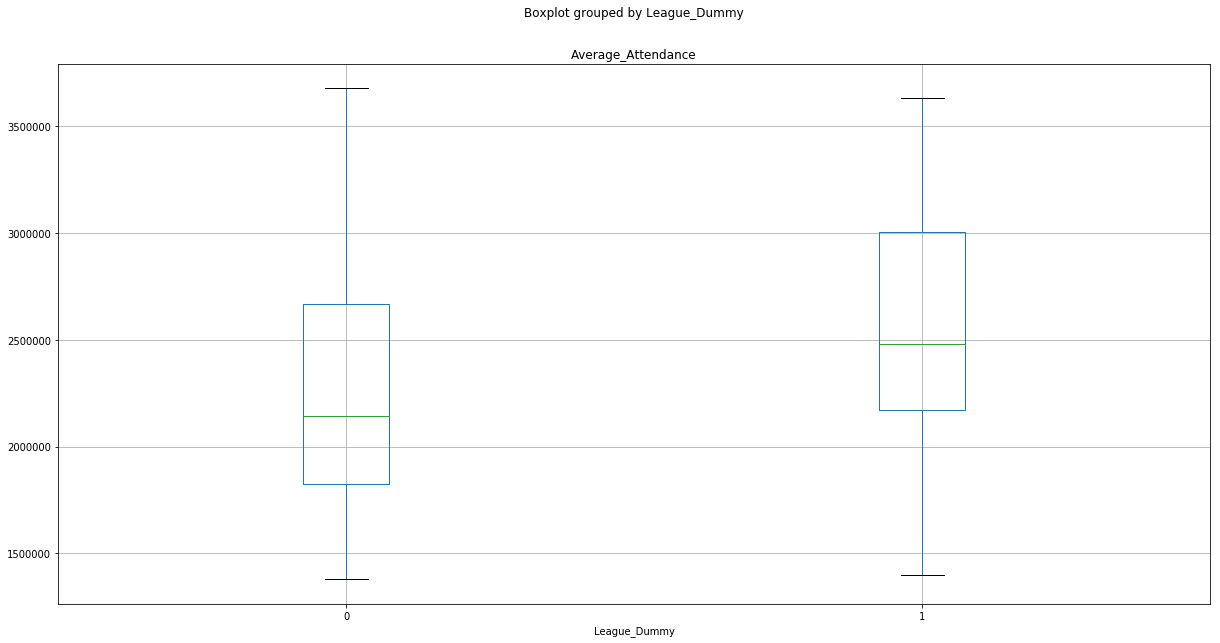

In [54]:
# Create a boxplot to compare means, 1=NationalLeague
baseball_final.boxplot("Average_Attendance", by="League_Dummy", figsize=(20, 10))
plt.savefig("Boxplot_League.png")

In [287]:
group1 = baseball_final[baseball_final["League_Dummy"] == 0]["Average_Attendance"]
group2 = baseball_final[baseball_final["League_Dummy"] == 1]["Average_Attendance"]

In [288]:
stats.ttest_ind(group1, group2, equal_var=False)


Ttest_indResult(statistic=-1.2372042848866758, pvalue=0.22546248542862188)

In [289]:
stats.f_oneway(group1, group2)

F_onewayResult(statistic=1.5373760133966945, pvalue=0.2243127978631311)

In [ ]:
#dummy_ranks = pd.get_dummies(baseball_df['War_Dummy'], prefix='War_Dummy')
#dummy_ranks.head()

Text(-1,0.5,'Attendance')

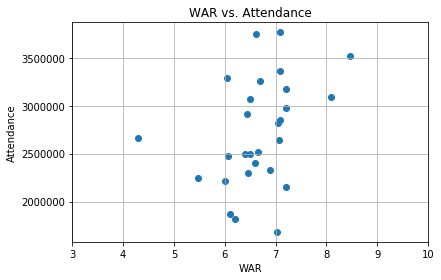

In [203]:
# Build a scatter plot for each data typeitem_data_pd = pd.DataFrame({"Average_Attendance": avg_attendance, "Average_WAR": avg_war, "Average_Wins": avg_wins})
#item_data_pd
plt.scatter(baseball_final["Average_WAR"], baseball_final["Average_Attendance"], marker="o")
ax1.plot(baseball_final["Average_WAR"], violent_crime_rate, linewidth=1, marker="o")
ax1.plot(year, vc_fit, "b--", linewidth=1)
# Incorporate the other graph properties
plt.title("WAR vs. Attendance")

plt.xlabel("WAR")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot

plt.tight_layout()
plt.ylim(1579118.25, 3870599.4)
plt.xlim(3, 10)
plt.ylabel("Attendance")

(60, 100)

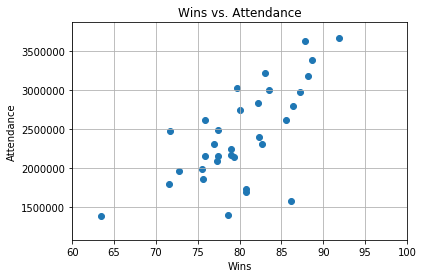

In [63]:
#plt.xlim(2, 10)

#plt.plot( W_fit, linewidth=1)
plt.ylabel("Attendance")
plt.scatter(baseball_final["Average_Wins"], baseball_final["Average_Attendance"], marker="o")
#plt.plot(baseball_final["Average_Wins"], Win_fit, "b--", linewidth=1)
# Incorporate the other graph properties
plt.title("Wins vs. Attendance")

plt.xlabel("Wins")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot
plt.savefig("ScatterNoLine_Wins_Attnd.png")
#plt.tight_layout()
plt.ylim(1079118.25, 3870599.4)
plt.xlim(60, 100)


In [56]:
#`stats.linregress` to perform a linear regression with the year and violent crime rate columns.
#baseball_final["Average_WAR"]
#Attendance = baseball_final["Average_Attendance"]
W_slope, W_int, W_r, W_p, W_std_err = stats.linregress(baseball_final["Average_WAR"], baseball_final["Average_Attendance"])
W_fit = W_slope * baseball_final["Average_WAR"]  + W_int

In [57]:
print(W_r)

0.508163276135


In [299]:
X = baseball_final["Average_WAR"] ## X usually means our input variables (or independent variables)
y = baseball_final["Average_Attendance"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()
plt.savefig("OLS_WAR.png")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Average_Attendance   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     10.79
Date:                Mon, 08 Oct 2018   Prob (F-statistic):            0.00253
Time:                        21:31:07   Log-Likelihood:                -481.25
No. Observations:                  33   AIC:                             966.5
Df Residuals:                      31   BIC:                             969.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.089e+05   9.29e+05     -0.656      0.517    -2.5e+06    1.28e+06
Average_WAR  4.996e+05   1.52e+05      3.285      0.003    1.89e+05     8.1e+05
==============================================================================
Omnibus:                        0.293   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.287
Skew:                          -0.194   Prob(JB):                        0.866
Kurtosis:                       2.761   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
Win_slope, Win_int, Win_r, Win_p, Win_std_err = stats.linregress(baseball_final["Average_Wins"], baseball_final["Average_Attendance"])
Win_fit = Win_slope * baseball_final["Average_Wins"]  + Win_int

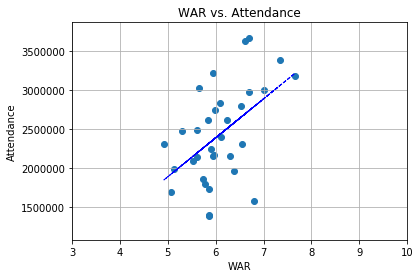

In [59]:
#plt.xlim(2, 10)

#plt.plot( W_fit, linewidth=1)
plt.ylabel("Attendance")
plt.scatter(baseball_final["Average_WAR"], baseball_final["Average_Attendance"], marker="o")
plt.plot(baseball_final["Average_WAR"], W_fit, "b--", linewidth=1)
# Incorporate the other graph properties
plt.title("WAR vs. Attendance")

plt.xlabel("WAR")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot

#plt.tight_layout()
plt.ylim(1079118.25, 3870599.4)
plt.xlim(3, 10)
plt.savefig("Scatter_WAR_Attnd.png")

(60, 100)

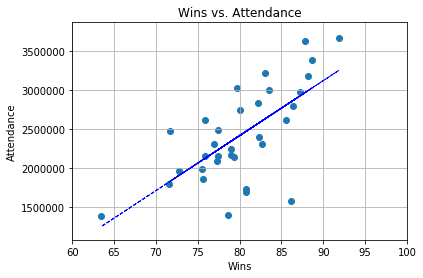

In [60]:
#plt.xlim(2, 10)

#plt.plot( W_fit, linewidth=1)
plt.ylabel("Attendance")
plt.scatter(baseball_final["Average_Wins"], baseball_final["Average_Attendance"], marker="o")
plt.plot(baseball_final["Average_Wins"], Win_fit, "b--", linewidth=1)
# Incorporate the other graph properties
plt.title("Wins vs. Attendance")

plt.xlabel("Wins")
plt.grid(True)

# Save the figure
#plt.savefig("Temperature.png")
# Show plot
plt.savefig("Scatter_Wins_Attnd.png")
#plt.tight_layout()
plt.ylim(1079118.25, 3870599.4)
plt.xlim(60, 100)


In [ ]:
print()

In [74]:
#def trendline(Attendance, War_stat, order=1, c='r', alpha=1, Rval=False):
    #"""Make a line of best fit"""

    #Calculate trendline
    coeffs = np.polyfit(Attendance, War_stat, order)

    intercept = coeffs[-1]
    slope = coeffs[-2]
    power = coeffs[0] if order == 2 else 0

    minAttendance = np.min(Attendance)
    maxAttendance = np.max(Attendance)

    xl = np.array([minAttendance, maxAttendance])
    yl = power * xl ** 2 + slope * xl + intercept

    #Plot trendline
    plt.plot(xl, yl, c, alpha=alpha)

    #Calculate R Squared
    p = np.poly1d(coeffs)

    ybar = np.sum(War_stat) / len(War_stat)
    ssreg = np.sum((p(Attendance) - ybar) ** 2)
    sstot = np.sum((War_stat - ybar) ** 2)
    Rsqr = ssreg / sstot

    if not Rval:
        #Plot R^2 value
        plt.text(0.8 * maxAttendance + 0.2 * minAttendance, 0.8 * np.max(War_stat) + 0.2 * np.min(War_stat),
                 '$R^2 = %0.2f$' % Rsqr)
    else:
        #Return the R^2 value:
        return Rsqr
    return trendline

NameError: name 'coeffs' is not defined